In [1]:
from openpyxl import Workbook, load_workbook
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Упражнения - Python и Excel
 Создайте Python скрипт, который:
 - Создает новый Excel файл.
 - Добавляет два листа с именами "Лист1" и "Лист2".
 - Заполняет "Лист1" таблицей умножения (10x10).
 - Копирует данные из "Лист1" в "Лист2" и добавляет заголовок "Таблица умножения".


In [2]:
# новый Excel файл.
workbook=Workbook()
# Добавим два листа с именами "List1" и "List1"
sheet = workbook.active
sheet.title ='List1'
new_sheet=workbook.create_sheet(title='List2') 

#Заполняет "List1" таблицей умножения 

for row in range(1,11):
    for col in range (1,11):
        sheet.cell(row=row,column=col, value =row*col)

#Копируем данные из "List1" в "List2" добавляем заголовок "таблица Пифагора"
new_sheet['B1']="таблица Пифагора"
for row in range (1,11):
    for col in range (1,11):
        new_sheet.cell(row=row+1,column=col+1, value=sheet.cell(row=row,column=col).value)

workbook.save("Python_and_Excel.xlsx")

## 2. Упражнения - Python и Excel
Напишите скрипт, который:
 - Открывает существующий Excel файл с данными о продажах.
 - Вычисляет сумму продаж по каждому продавцу.
 - Строит круговую диаграмму, показывающую долю продаж каждого продавца.

мы будем вычислять сумму продаж для каждого города и строить круговую диаграмму с долей каждого города.

### способ с записью экселевского листа в датафрейм через метод read_excel()

In [3]:
# путь к файлу
file_path='Sales.xlsx'
# записываем в датафрейм файл
data= pd.read_excel(file_path)
data.head()

,month_id,id_client,city,count,amount
0,1,ee47d746-6d2f-4d3c-9622-c31412542920,Moscow,1,64104
1,2,375e0724-f033-4c76-b579-84969cf38ee2,Krasnodar,11,56043
2,3,6644e5b4-9934-4863-9778-aaa125207701,Lobya,16,136970
3,4,c971fb21-d54c-4134-938f-16b62ee86d3b,Moscow,1,97455
4,5,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,Krasnodar,16,23158


In [4]:
grouped = data.copy(deep=True)
grouped = grouped.groupby('city')['amount'].sum().reset_index()
grouped

,city,amount
0,Krasnodar,37712804
1,Lobya,40506218
2,Moscow,40748727


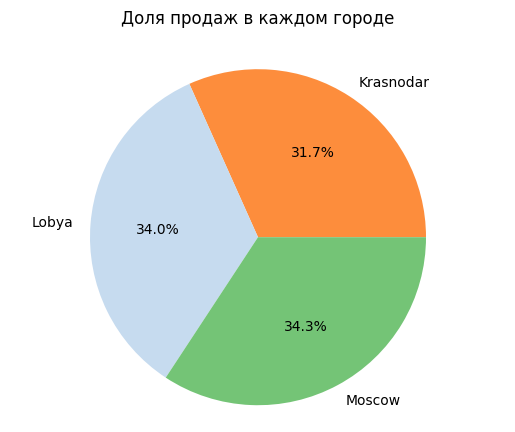

In [5]:
city = grouped['city']
values = grouped['amount']
tab20c = plt.color_sequences["tab20c"]
outer_colors = [tab20c[i] for i in [5, 3, 9]]
plt.pie(values, labels = city, autopct = '%1.1f%%', colors = outer_colors)
plt.title('Доля продаж в каждом городе\n')
plt.axis('equal')  # Чтобы круговая диаграмма была настоящим кругом
plt.show()

### способ -  получаем данные без датафрейма из книги

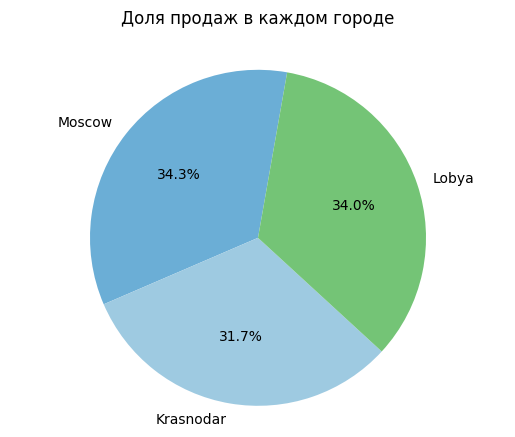

In [6]:
# способи без записи данных в датафрейм
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import Font

# путь к файлу
file_path='Sales.xlsx'

workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active  
# слварь для записи город ключ значение сумма продаж общая
sales_summary = {}

# min_row (int) – smallest row index (1-based index)

for row in sheet.iter_rows(min_row=2, values_only=True):
    i = row[2]
    sum_total = row[4]

    if i in sales_summary:
        sales_summary[i] += sum_total
    else:
        sales_summary[i] = sum_total


cities = list(sales_summary.keys())
sales_values = list(sales_summary.values())
tab20c = plt.color_sequences["tab20c"]
outer_colors = [tab20c[i] for i in [1, 2, 9]]

plt.pie(sales_values, labels=cities, autopct='%1.1f%%', colors = outer_colors, startangle=800)
plt.title('Доля продаж в каждом городе\n')
plt.axis('equal')
plt.show()

## 3. Упражнения - Python и Excel
Создайте скрипт, который:
 - Читает данные из CSV файла.
 - Записывает данные в Excel файл, форматируя заголовки столбцов жирным шрифтом и устанавливая ширину столбцов автоматически.

In [8]:
import openpyxl.formatting
import openpyxl.formatting.formatting
import openpyxl.formula
import pandas as pd
import openpyxl

df_csv = pd.read_csv('sales_format.csv', sep=';')

workbook = openpyxl.Workbook()
sheet = workbook.active
header = df_csv.columns.to_list()
print('Заголовки для таблицы:', header)

Заголовки для таблицы: ['month_id', 'id_client', 'amount', 'count', 'city']


In [9]:
df_csv.head(2)

,month_id,id_client,amount,count,city
0,1,ee47d746-6d2f-4d3c-9622-c31412542920,64104,1,moscow
1,2,375e0724-f033-4c76-b579-84969cf38ee2,56043,11,krasnodar


In [10]:
# Добавляем группу значений(заголовки) в нижней части текущего листа.
sheet.append(header)


In [11]:
# делаем заголовки жирным шрифтом
for row in sheet.iter_rows(max_row=1):
    for cell in row:
        cell.font = openpyxl.styles.Font(bold=True)

# перебираем строки и добоваляем данные
for index, row in df_csv.iterrows():
    sheet.append(list(row))
    
# установим ширину столбцов автоматически
for col in sheet.columns:
    max_length = 0
    column = col[0].column_letter
    for cell in col:
        if len(str(cell.value)) > max_length:
            max_length = len(str(cell.value))
    adjusted_width = (max_length + 2) * 1.2
    workbook.worksheets[0].column_dimensions[column].width = adjusted_width

workbook.save('sales_format.xlsx')

![image.png](../images/10_01.png)

In [ ]:
# !pip freeze > requuirements.txt